# Business Understanding

SyriaTel faces challenges with customer churn, where customers stop using their services. The goal of this project is to predict whether a customer is likely to churn based on their usage patterns, contact details and other relevant factors. The primary stakeholders are SyriaTel's management team, marketing department and customer retention team, who are responsible for understanding customer behavior and implementing strategies to retain customers. By identifying at risk customers early, SyriaTel can take proactive measures such as personalized offers, improved customer service or loyalty programs to reduce churn, enhance customer satisfaction and increase revenue.

# Data Understanding

The goal is to explore the astructure and size of the dataset, understand the key features and identify any patterns or anomalies. This includes checking for missing values, non-numeric data and distributions in columns like contract type, customer service calls and monthly charges. This step helps prepare the data for preprocessing and model development.

In [ ]:
!pip install xgboost

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
import xgboost as xgb

In [ ]:
df = pd.read_csv('SyriaTel_customer_churn.csv')

In [ ]:
#Printing the first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
#Summary of numeric columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Checking for unique values in categorical columns
categorical_columns = ['international plan', 'voice mail plan', 'churn']
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())


Unique values in 'international plan':
no     3010
yes     323
Name: international plan, dtype: int64

Unique values in 'voice mail plan':
no     2411
yes     922
Name: voice mail plan, dtype: int64

Unique values in 'churn':
False    2850
True      483
Name: churn, dtype: int64


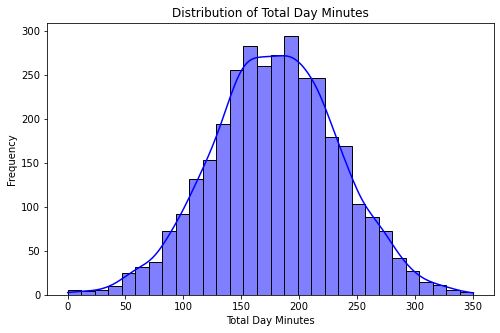

In [ ]:
#Visualize data patterns
#Distribution of total day minutes
plt.figure(figsize=(8, 5))
sns.histplot(df['total day minutes'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.show()

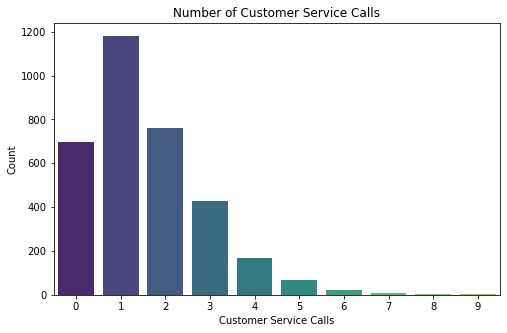

In [ ]:
#Distribution of customer service calls
plt.figure(figsize=(8, 5))
sns.countplot(x='customer service calls', data=df, palette='viridis')
plt.title('Number of Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.show()

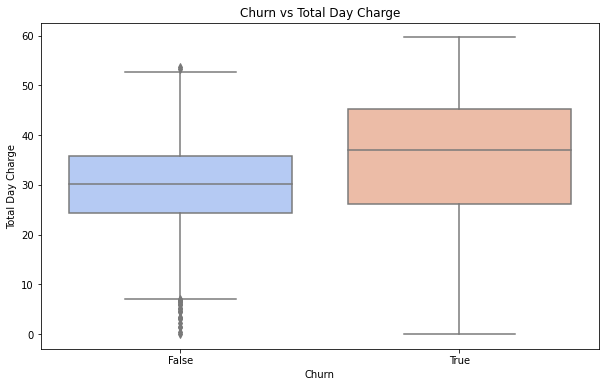

In [ ]:
#Relationship between churn and total charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day charge', data=df, palette='coolwarm')
plt.title('Churn vs Total Day Charge')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')
plt.show()